# AutoEncoder for CSC

###  Import and function definition

In [1]:
import pandas as pd
import numpy as np
import math, time, copy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

from utilities import *
from ResNet import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using:", device)

You are using: cuda


### Loading Data from previous strep

In [4]:
me = "hRHGlobalm3"
data = np.load(me+'_files.npz')
selected_chamber = data["imgs"]

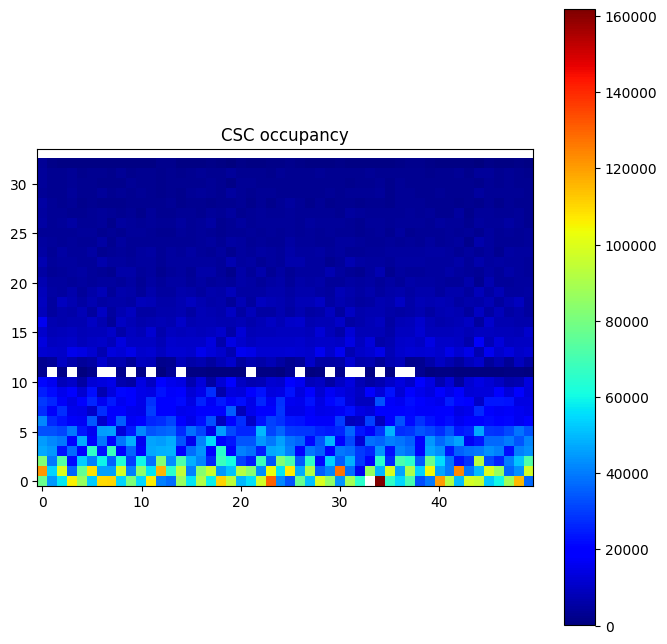

In [5]:
mean_matrix = np.mean(selected_chamber, axis=0)
dim = len(selected_chamber)
Show2Dimg(mean_matrix)
mean_matrix[mean_matrix == 0] = np.nan

In [6]:
tensor_list = [(torch.tensor(m, dtype=torch.float32)).unsqueeze(0) for m in selected_chamber]
print(tensor_list[0].size())
training_dim = int(dim*0.85)
training_tensor = tensor_list[:training_dim]
validation_tensor = tensor_list[training_dim:]
print(f"Data ({len(selected_chamber)}) = Training sample ({len(training_tensor)}) + Validation sample ({len(validation_tensor)})")

torch.Size([1, 34, 50])
Data (887) = Training sample (753) + Validation sample (134)


In [7]:
#for k in range(len(validation_tensor)):
#    for i in range(50, 100):
#        for j in range(50, 100):
#            if (i<1.3*j-15 and i>0.7*j+15):
#                validation_tensor[k][0][i][j]=0

In [8]:
training_dataset = TensorDataset(*training_tensor)
validation_dataset = TensorDataset(*validation_tensor)

training_loader = DataLoader(dataset=training_tensor, 
                             batch_size=64, 
                             num_workers=10, 
                             shuffle=True)

validation_loader = DataLoader(dataset=validation_tensor, 
                               batch_size=32,
                               num_workers=10, 
                               shuffle=False)

### Training Loop

In [9]:
ae = ResNetAE(1, 3, [16, 32, 64]).to(device)
optimizer = optim.Adam(ae.parameters(), lr=5.e-4)
train_loss, val_loss =[], []
epochs = 50
for e in range(epochs):
    epoch = e+1
    print(f'***** Training Epoch {epoch} *****')
    # Run training
    ae.train()
    now = time.time()
    tloss=[]
    for i, figure in enumerate(training_loader):
        X = figure.to(device)
        #X = X
        optimizer.zero_grad()
        Xreco = ae(X)
        
        #if i==1:
        #    PLots_in_training(X, Xreco)
        #print(X)
        #loss = F.l1_loss(Xreco, X)
        #loss = F.mse_loss(Xreco, X) smooth_l1_loss
        loss = F.l1_loss(Xreco, X)
        tloss.append(loss.item())
        loss.backward()
        optimizer.step()
        if i%4 ==0:
            print(f'>> [{i}/{len(training_loader)}] Train loss:{loss.item()}')
    train_loss.append(np.mean(tloss))
    now = time.time() - now
    s = '>> Training time: %.2f min in %d steps'%( now/60, len(training_loader))
    print(s)

***** Training Epoch 1 *****
>> [0/12] Train loss:13490.2734375
>> [4/12] Train loss:10124.96875
>> [8/12] Train loss:7188.4775390625
>> Training time: 0.04 min in 12 steps
***** Training Epoch 2 *****
>> [0/12] Train loss:5687.9443359375
>> [4/12] Train loss:5475.9091796875
>> [8/12] Train loss:5123.67138671875
>> Training time: 0.03 min in 12 steps
***** Training Epoch 3 *****
>> [0/12] Train loss:4839.828125
>> [4/12] Train loss:4822.4462890625
>> [8/12] Train loss:4580.94580078125
>> Training time: 0.04 min in 12 steps
***** Training Epoch 4 *****
>> [0/12] Train loss:4536.7919921875
>> [4/12] Train loss:4532.9931640625
>> [8/12] Train loss:4217.77392578125
>> Training time: 0.02 min in 12 steps
***** Training Epoch 5 *****
>> [0/12] Train loss:4345.68701171875
>> [4/12] Train loss:4086.54931640625
>> [8/12] Train loss:4080.9189453125
>> Training time: 0.02 min in 12 steps
***** Training Epoch 6 *****
>> [0/12] Train loss:4089.455810546875
>> [4/12] Train loss:3811.75048828125
>> [

### Validation dataset

In [11]:
torch.save(ae, "model.pth")
#model = torch.load('model.pth')

***** batch 0 *****
 >> Example 0
 >> Original image:


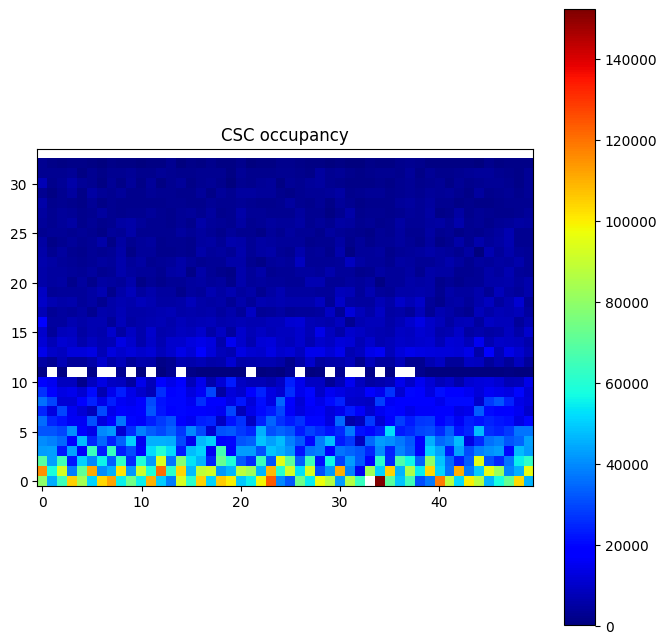

 >> AE-reco image:


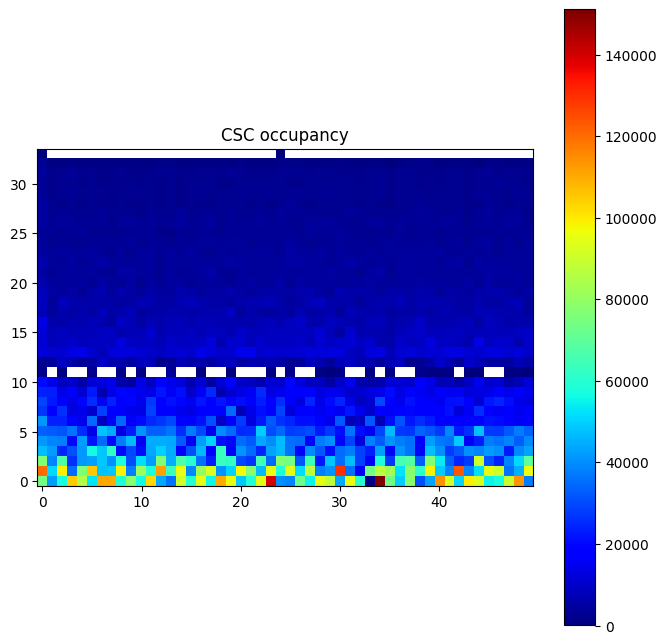

 >> Normalized loss map:


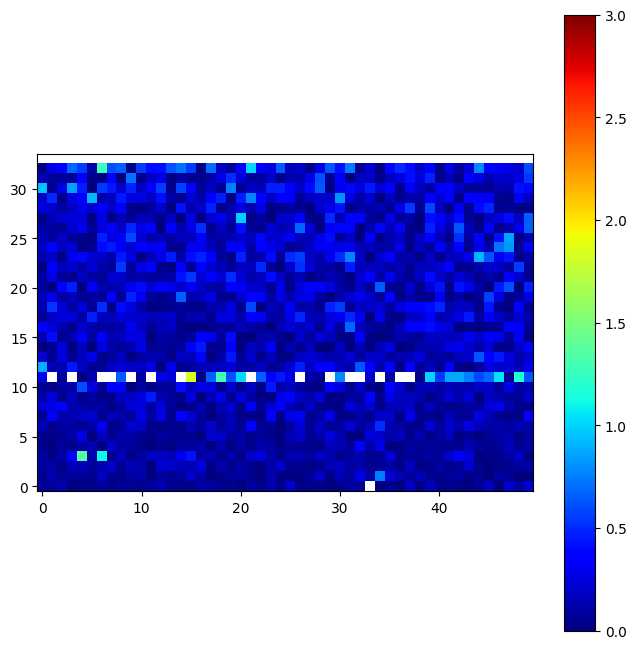

 >> Example 1
 >> Original image:


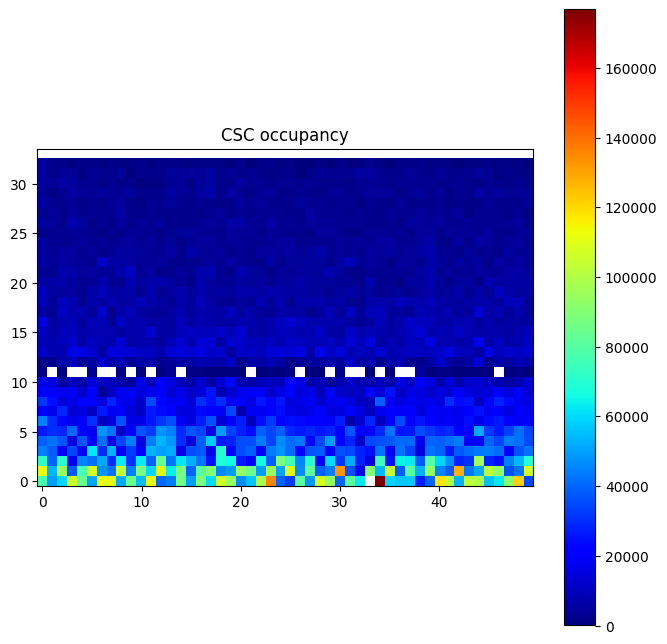

 >> AE-reco image:


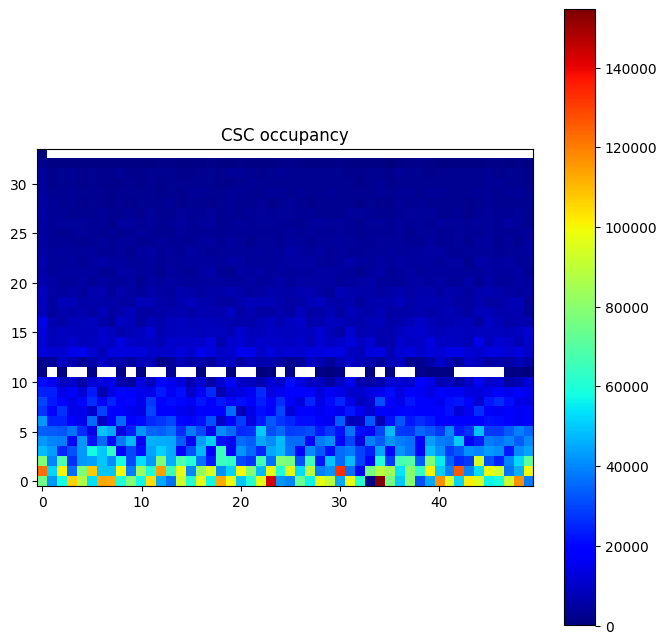

 >> Normalized loss map:


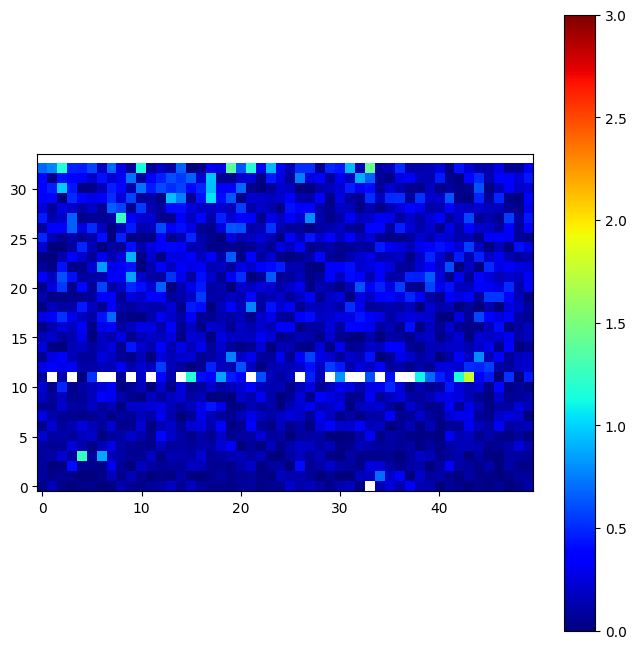

 >> Example 2
 >> Original image:


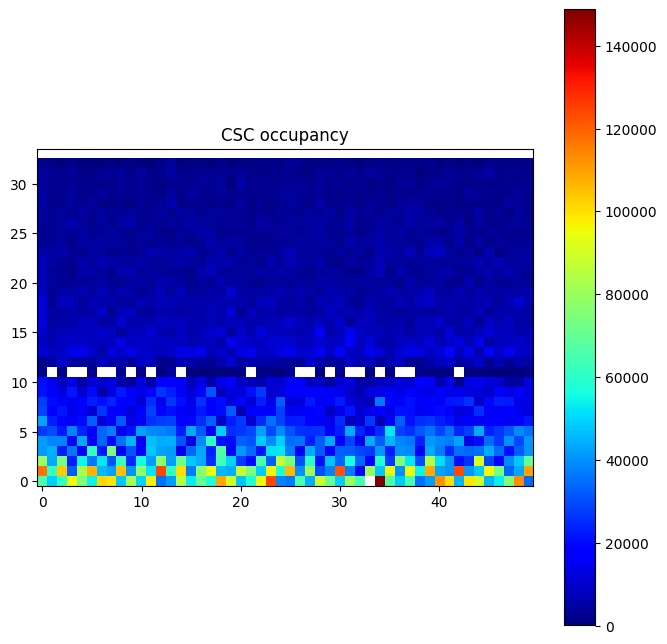

 >> AE-reco image:


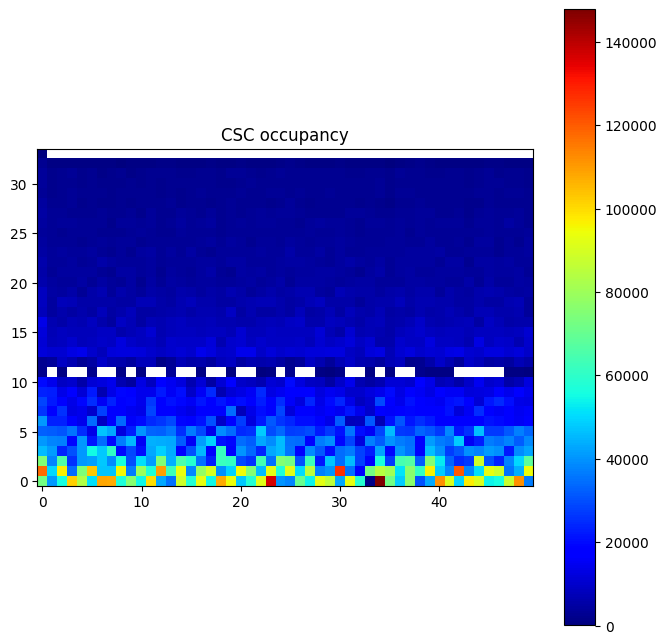

 >> Normalized loss map:


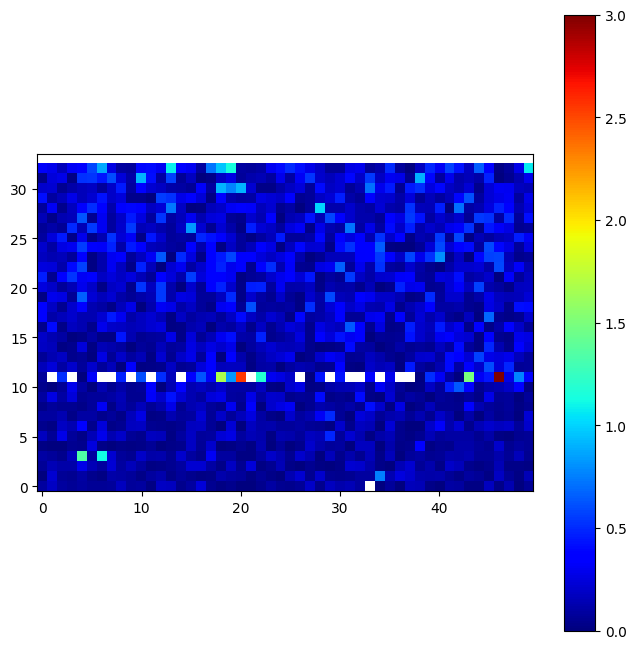

 >> Example 3
 >> Original image:


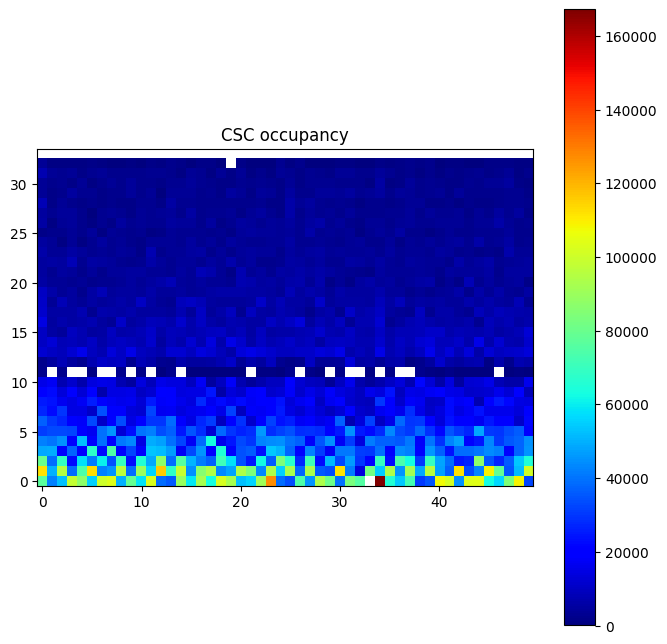

 >> AE-reco image:


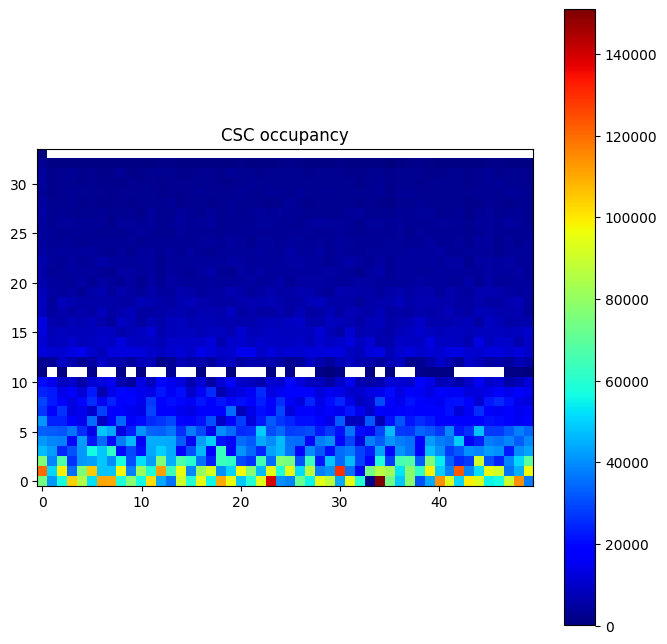

 >> Normalized loss map:


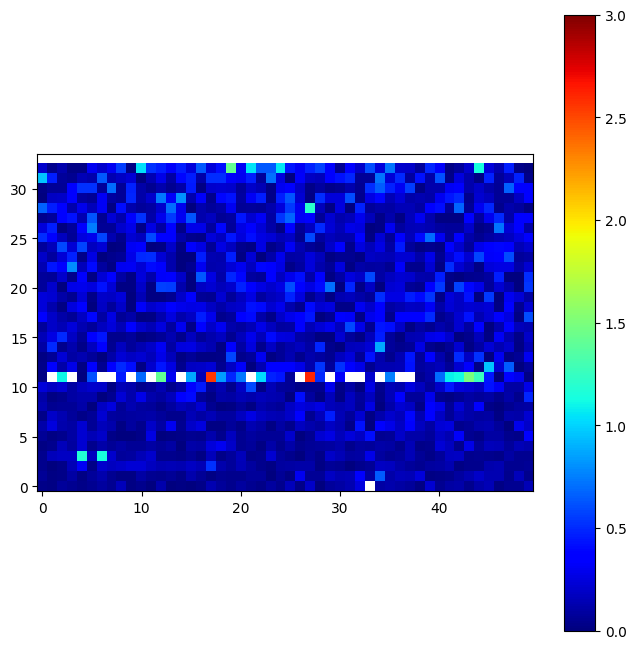

***** batch 1 *****
 >> Example 0
 >> Original image:


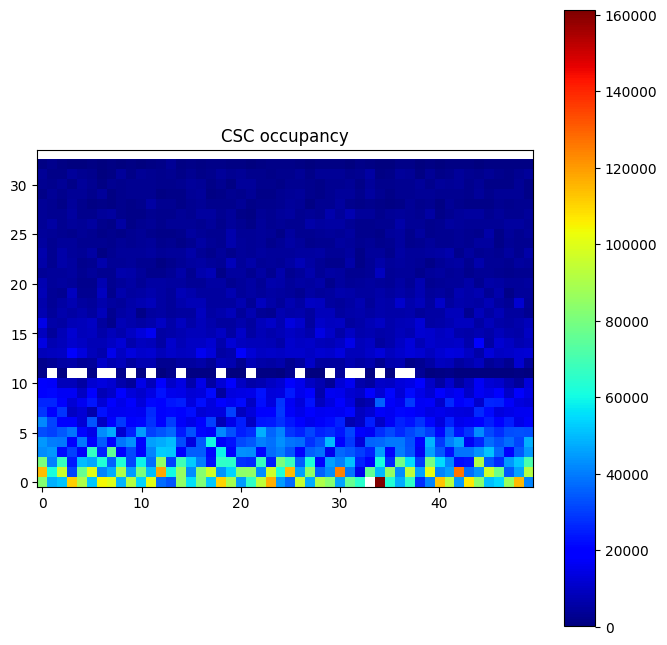

 >> AE-reco image:


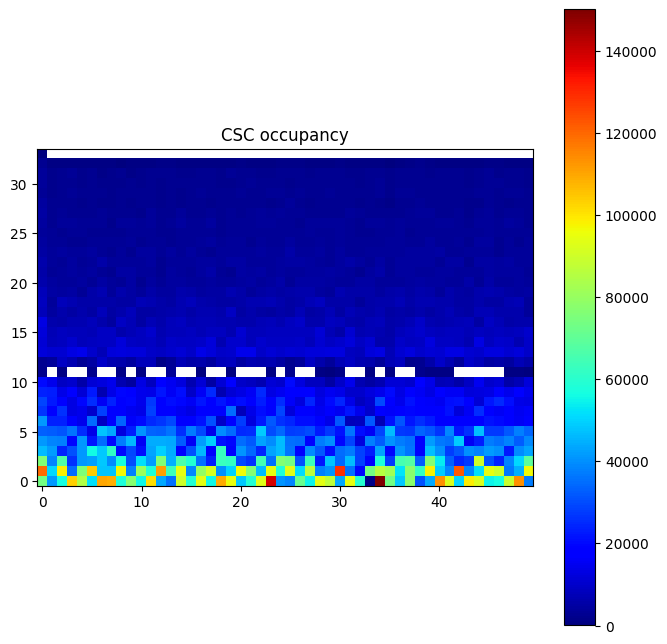

 >> Normalized loss map:


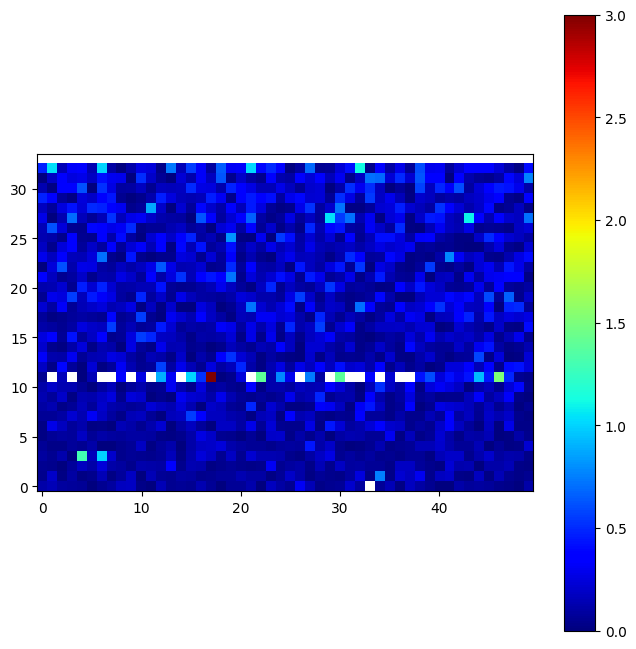

 >> Example 1
 >> Original image:


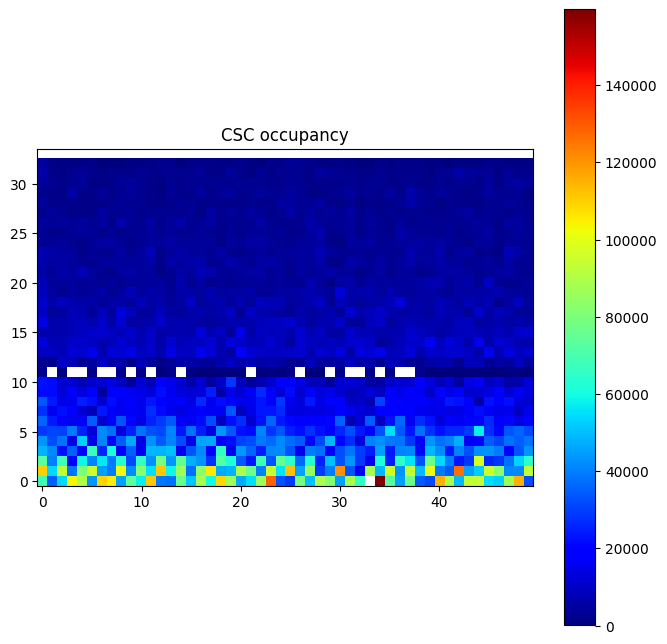

 >> AE-reco image:


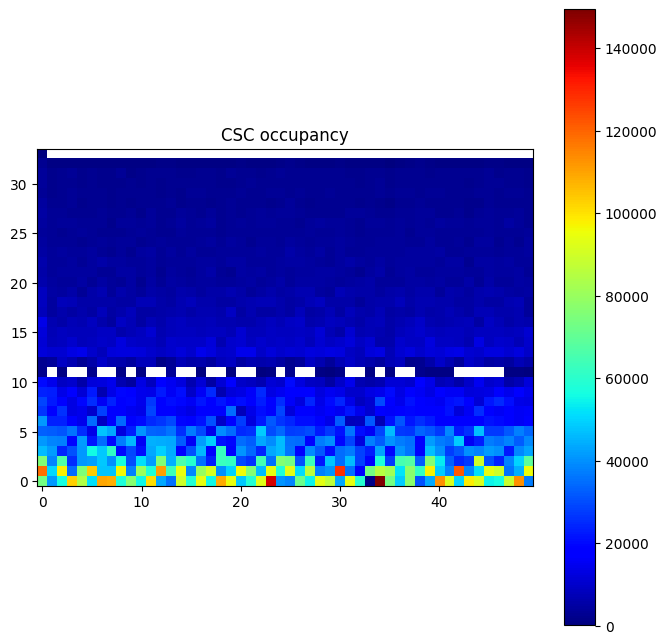

 >> Normalized loss map:


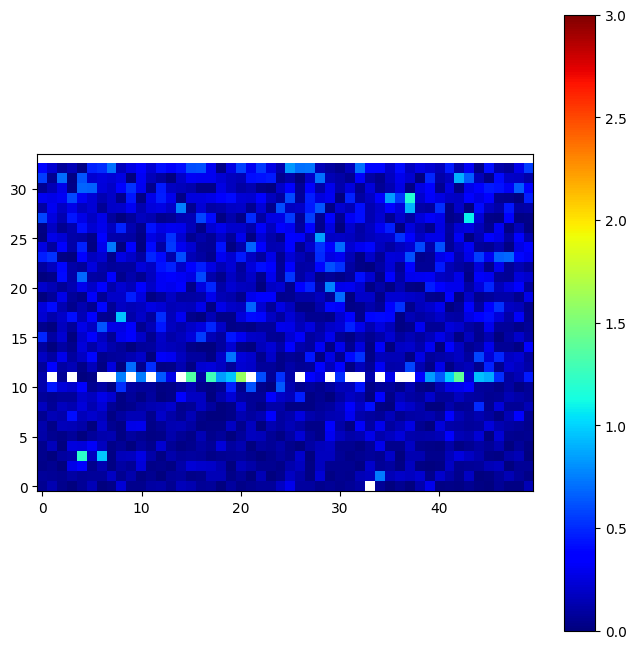

 >> Example 2
 >> Original image:


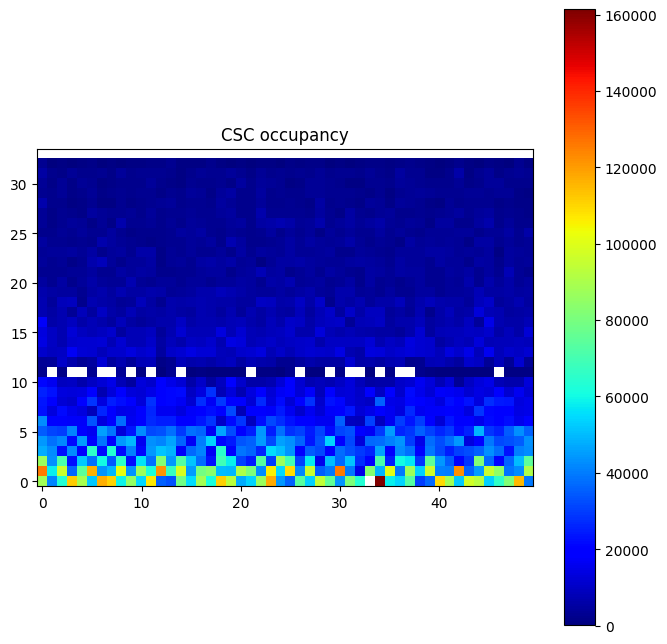

 >> AE-reco image:


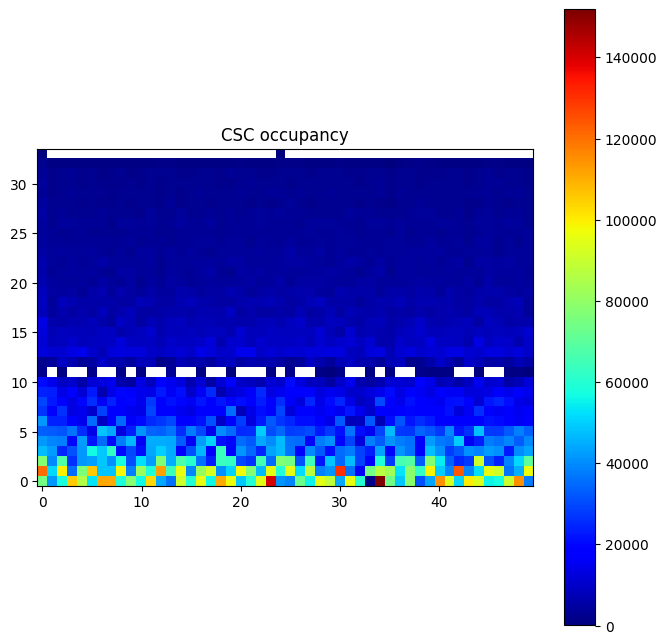

 >> Normalized loss map:


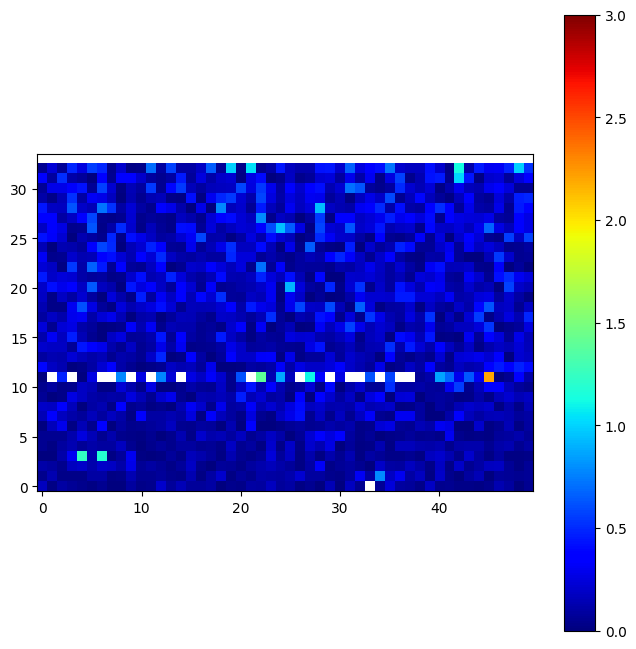

 >> Example 3
 >> Original image:


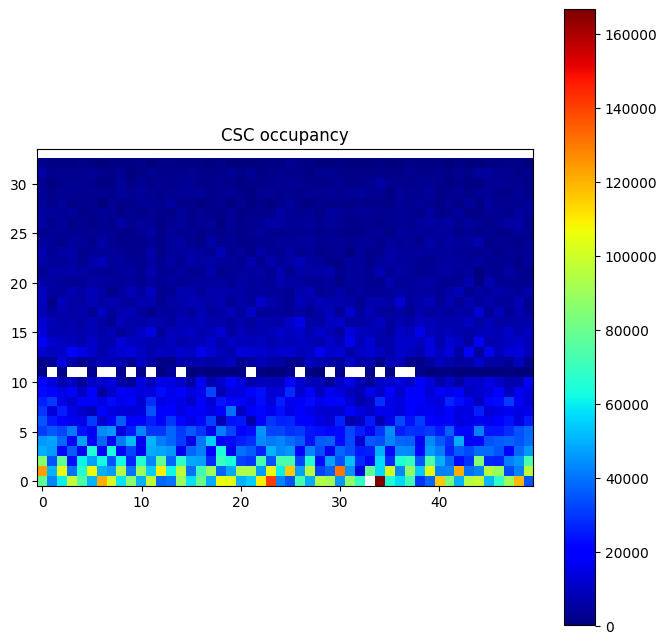

 >> AE-reco image:


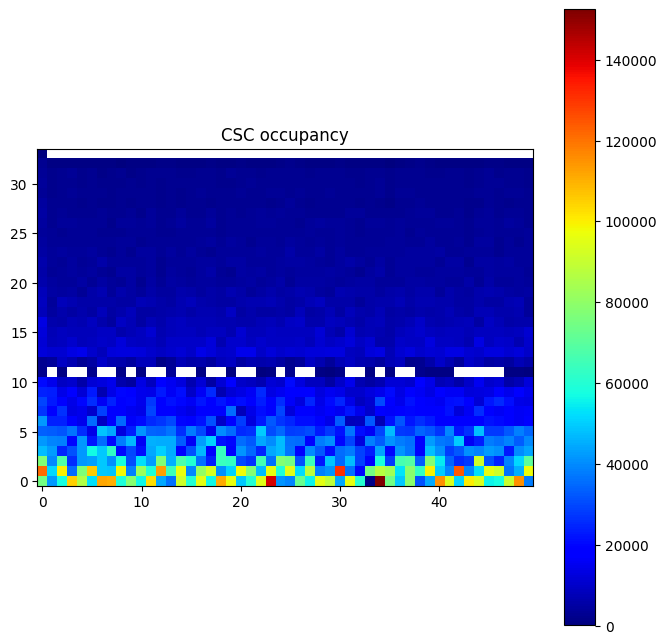

 >> Normalized loss map:


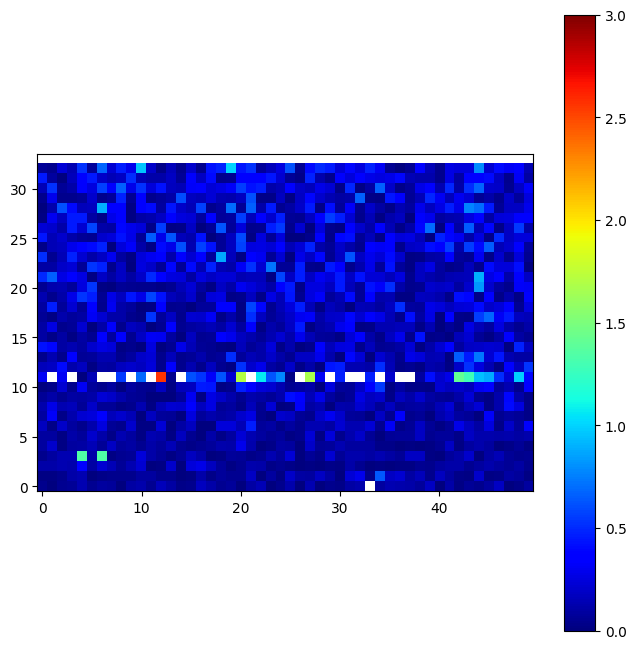

***** batch 2 *****
 >> Example 0
 >> Original image:


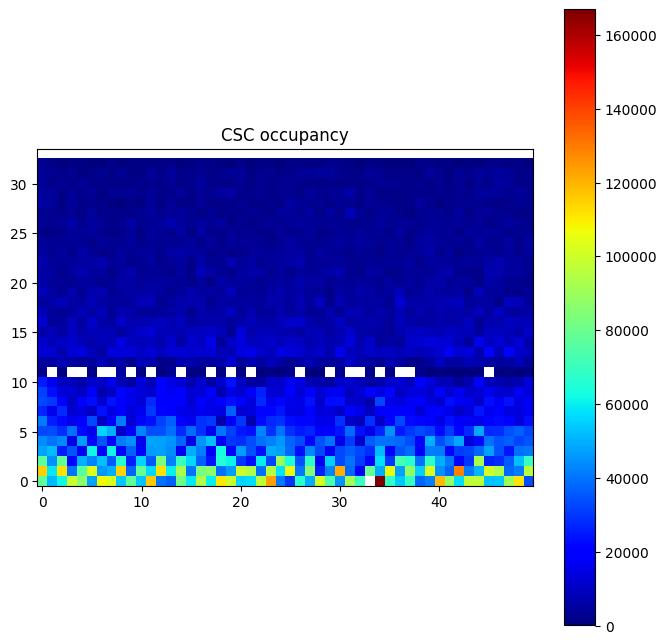

 >> AE-reco image:


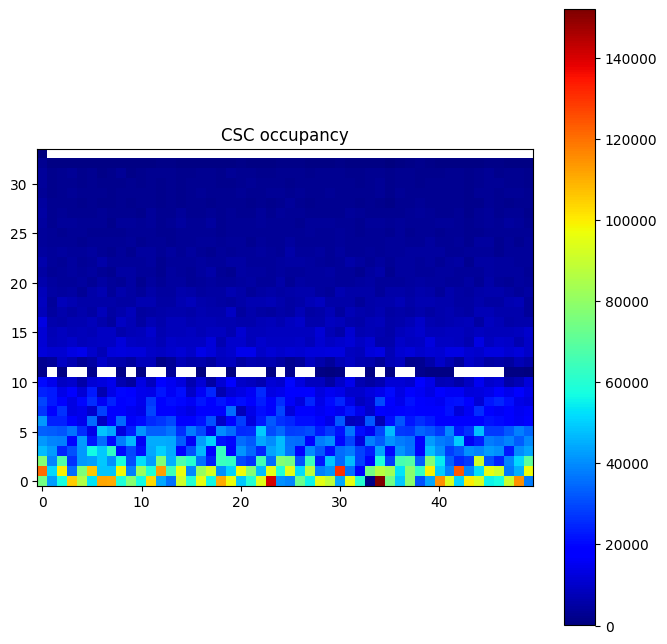

 >> Normalized loss map:


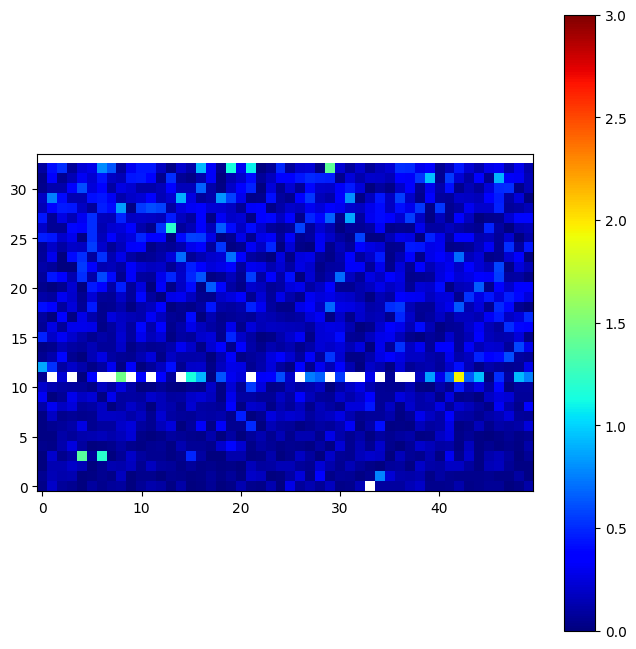

 >> Example 1
 >> Original image:


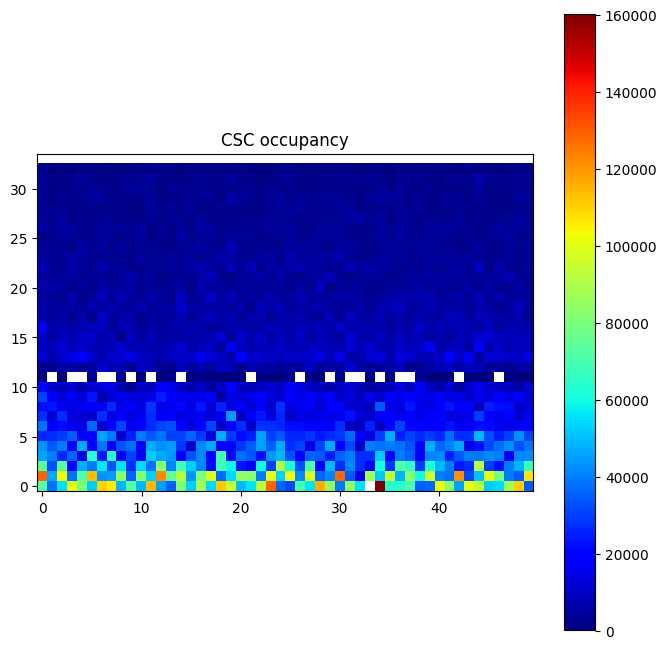

 >> AE-reco image:


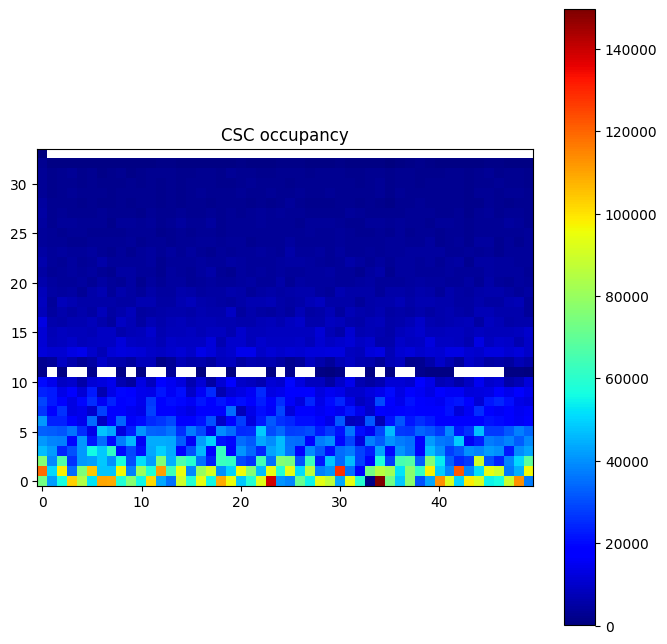

 >> Normalized loss map:


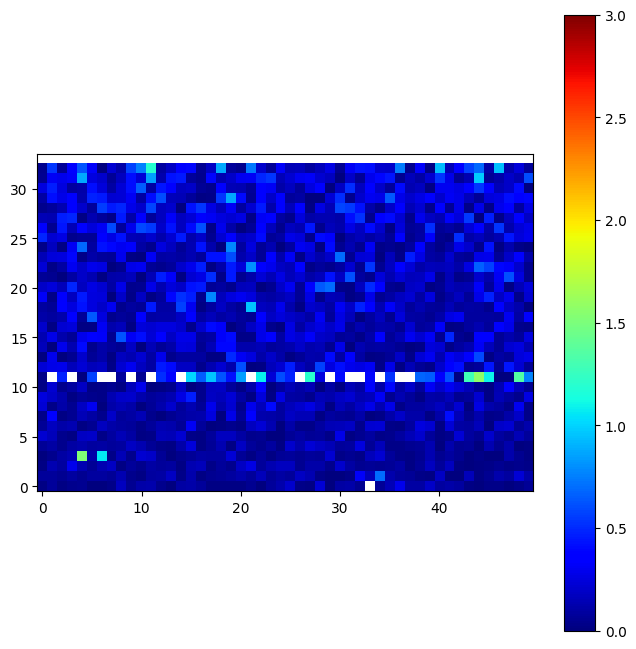

 >> Example 2
 >> Original image:


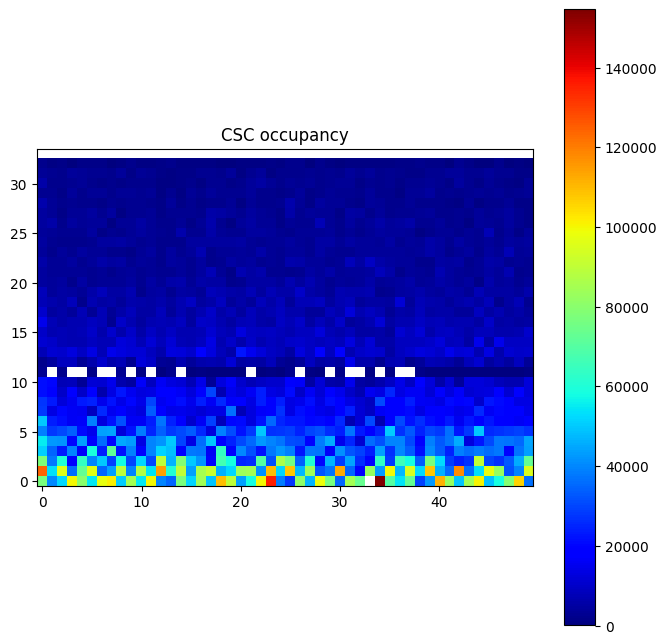

 >> AE-reco image:


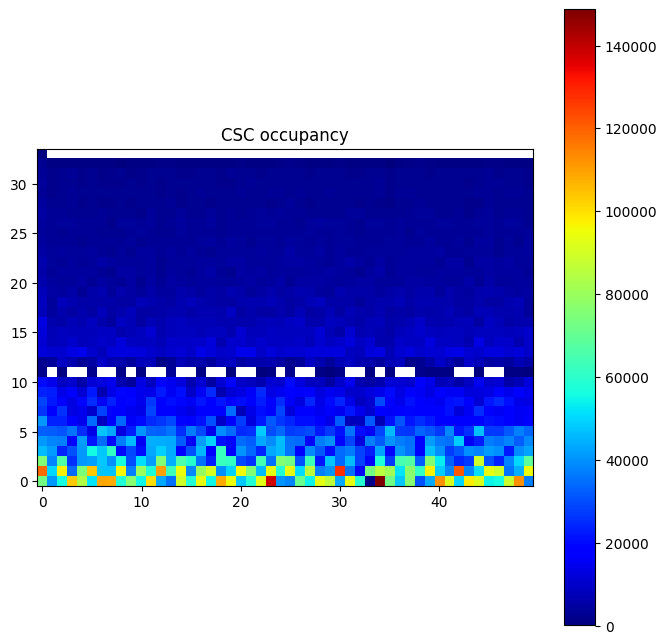

 >> Normalized loss map:


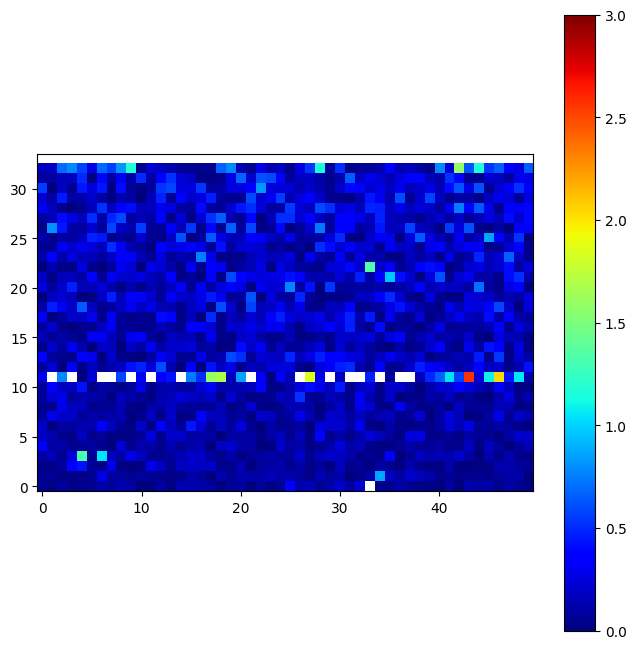

 >> Example 3
 >> Original image:


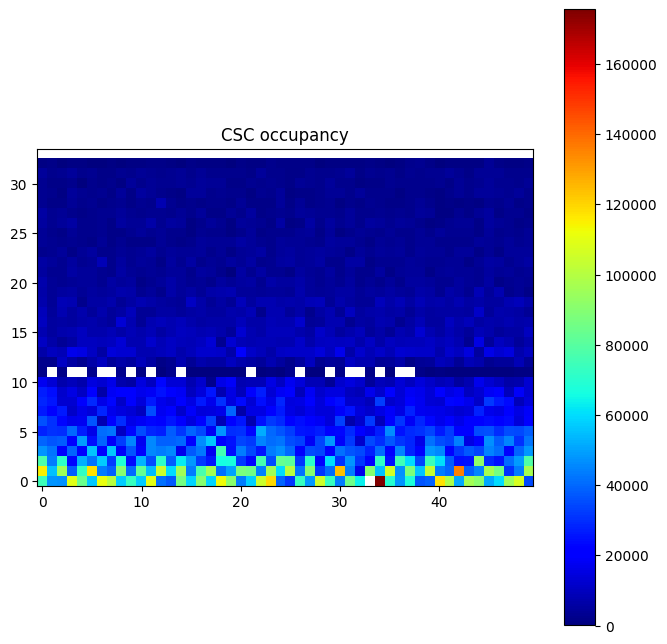

 >> AE-reco image:


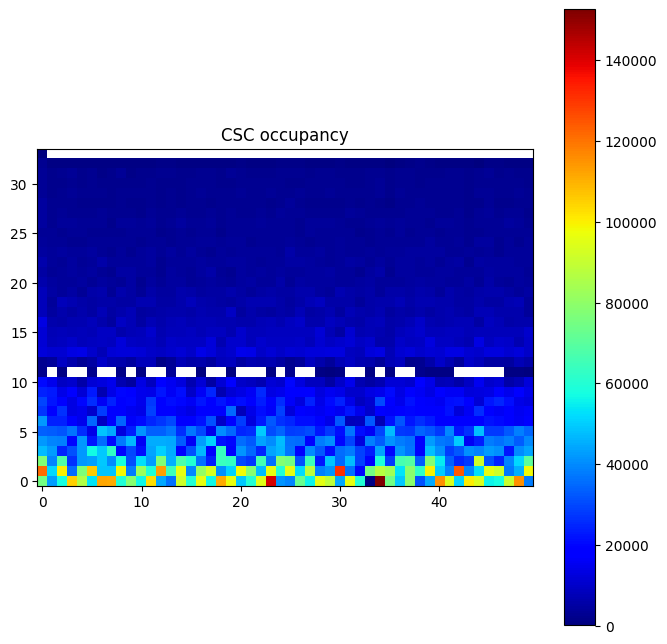

 >> Normalized loss map:


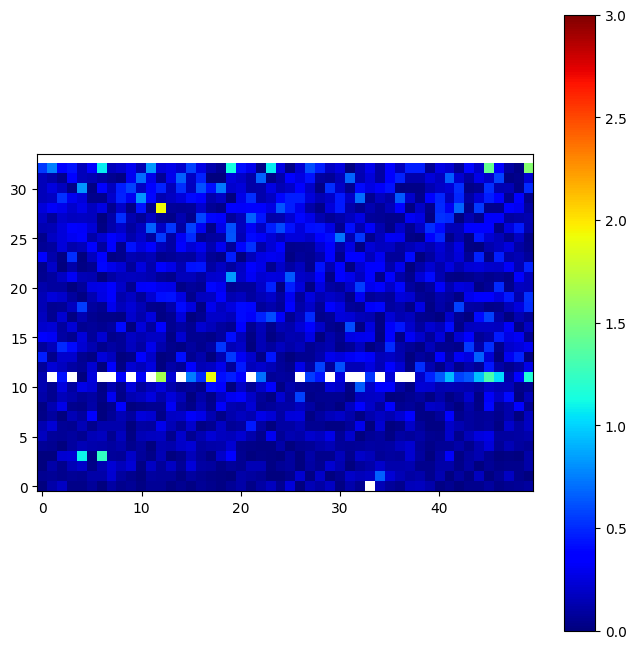

***** batch 3 *****
 >> Example 0
 >> Original image:


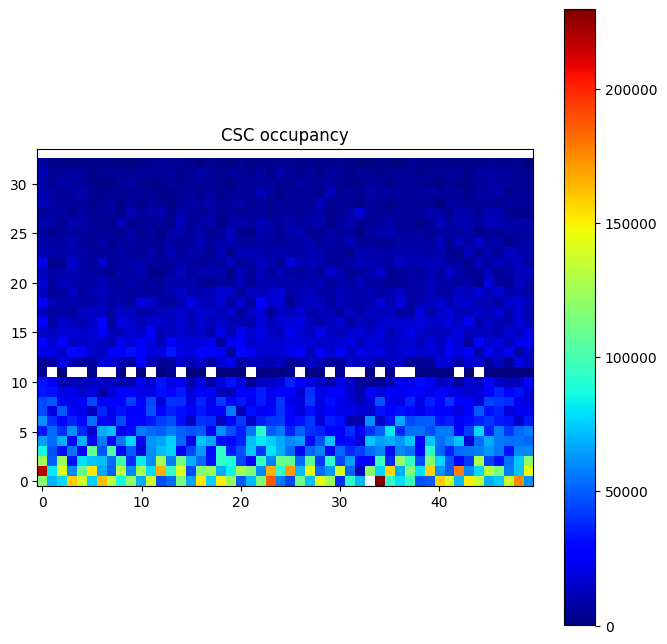

 >> AE-reco image:


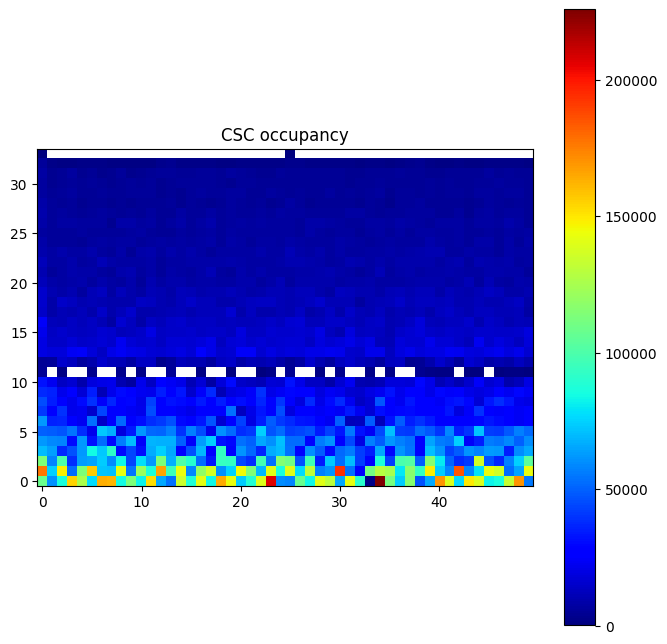

 >> Normalized loss map:


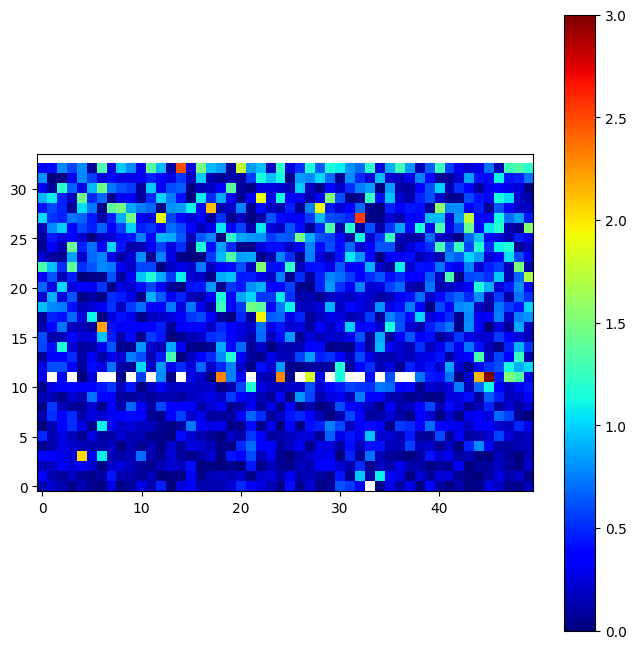

 >> Example 1
 >> Original image:


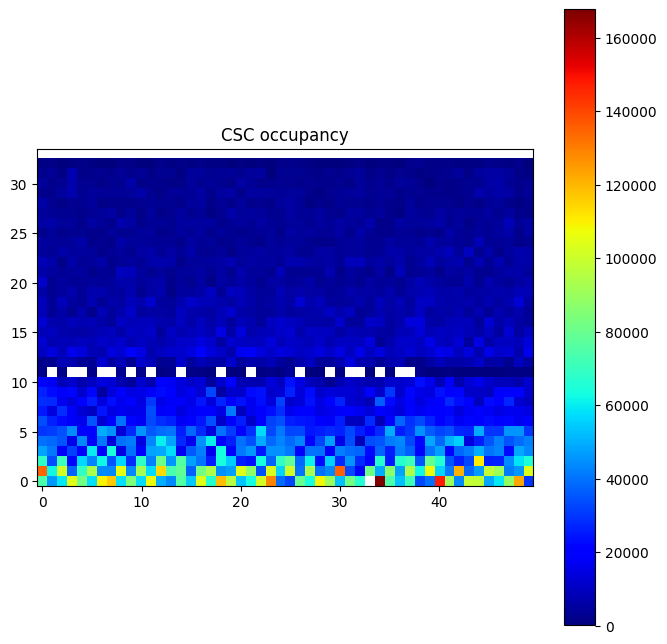

 >> AE-reco image:


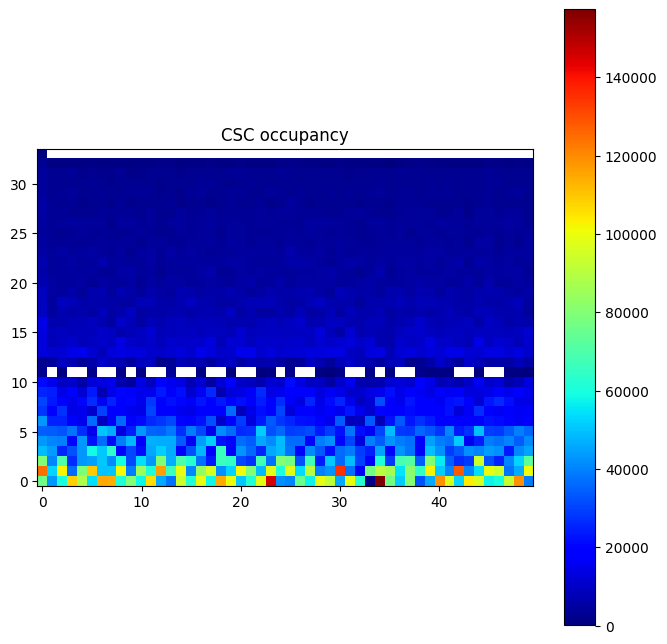

 >> Normalized loss map:


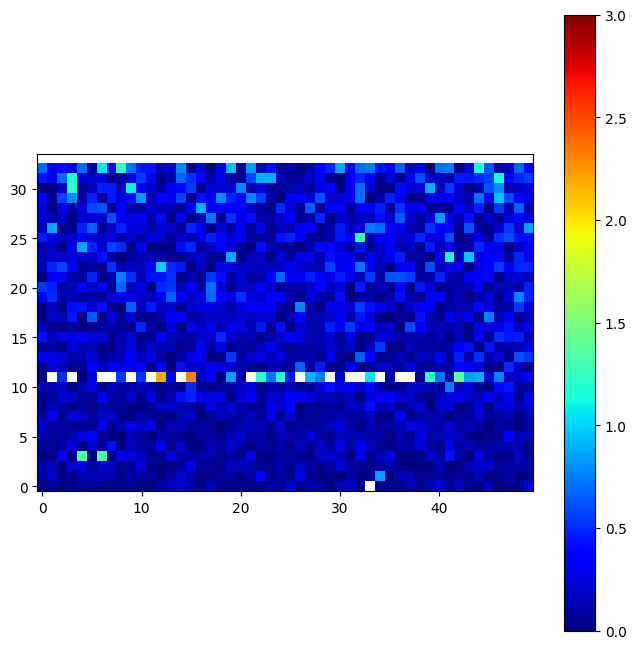

 >> Example 2
 >> Original image:


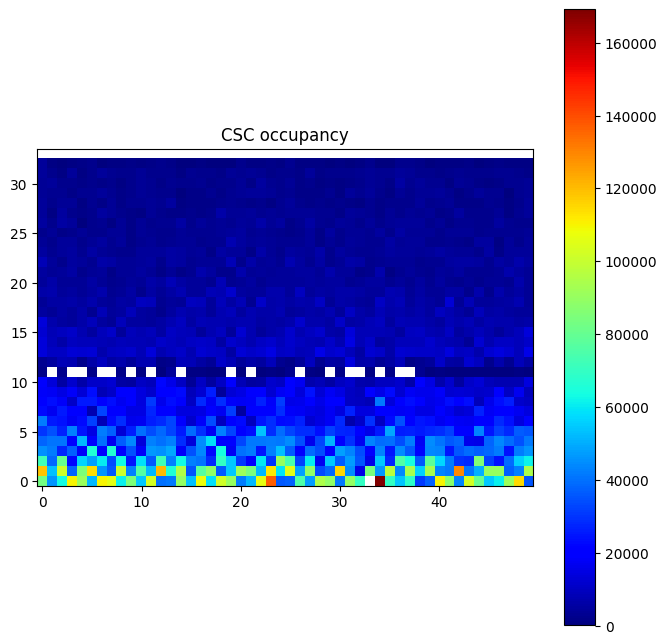

 >> AE-reco image:


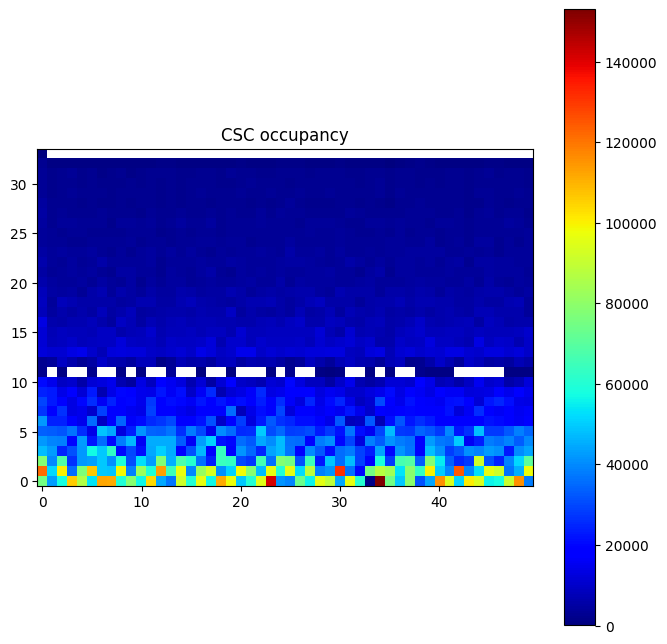

 >> Normalized loss map:


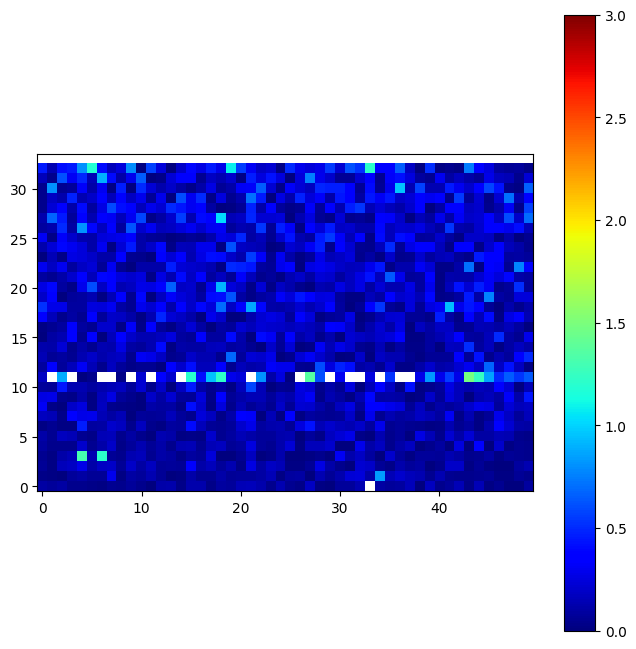

 >> Example 3
 >> Original image:


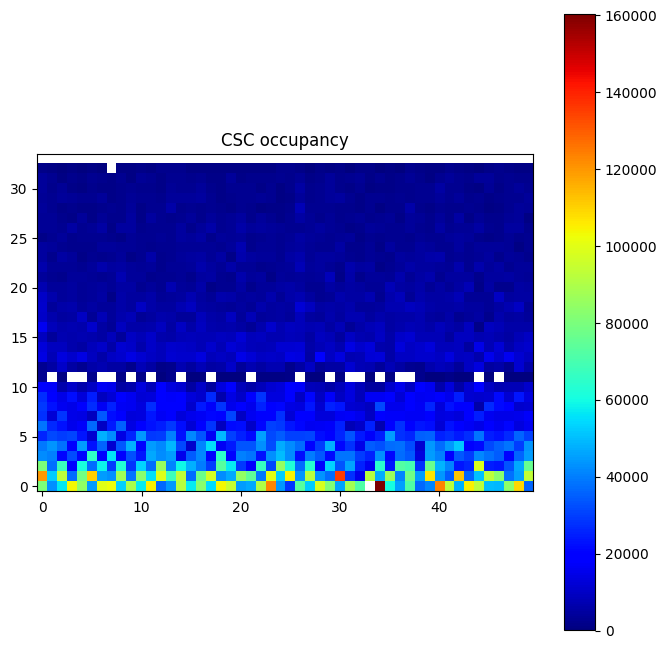

 >> AE-reco image:


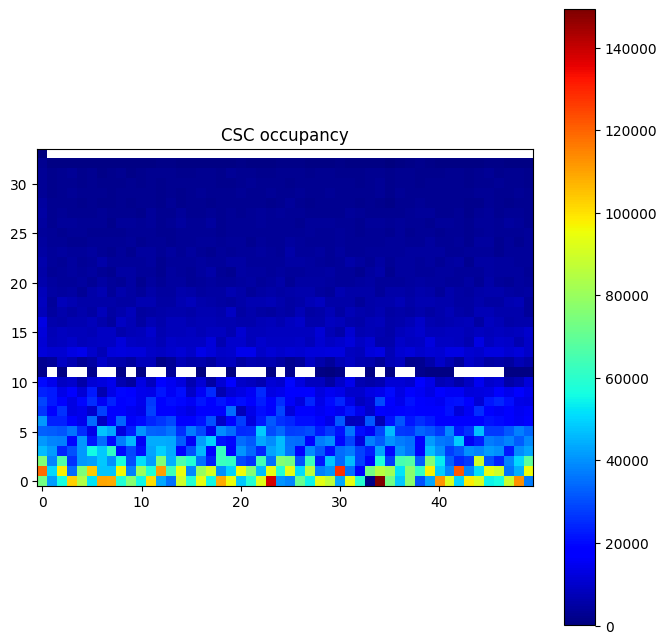

 >> Normalized loss map:


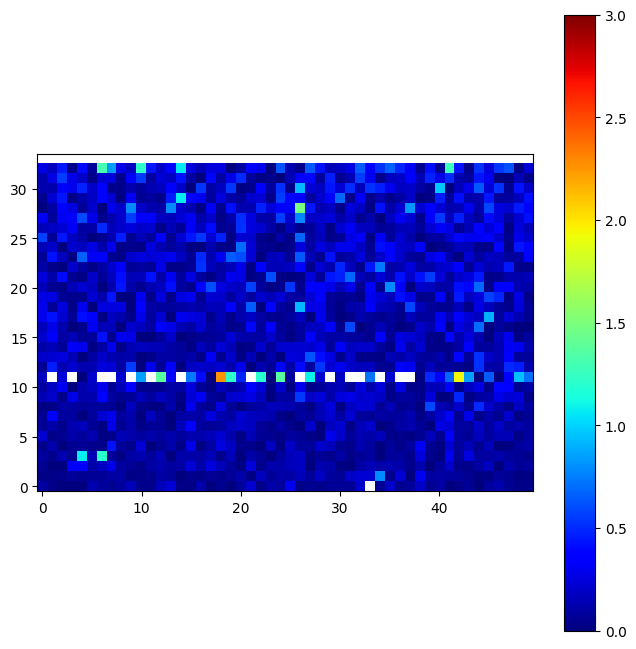

***** batch 4 *****
 >> Example 0
 >> Original image:


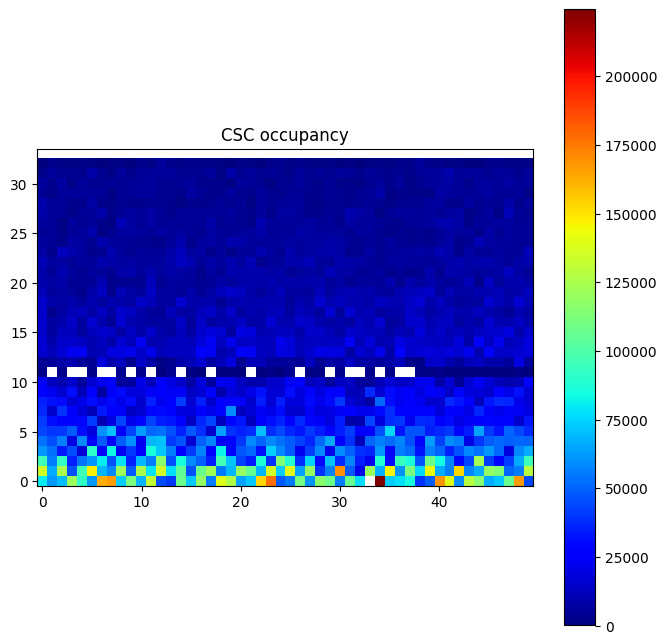

 >> AE-reco image:


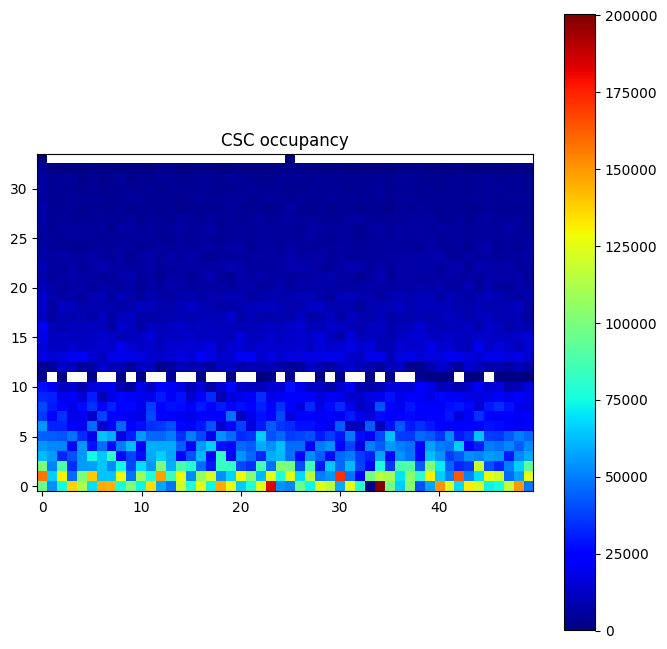

 >> Normalized loss map:


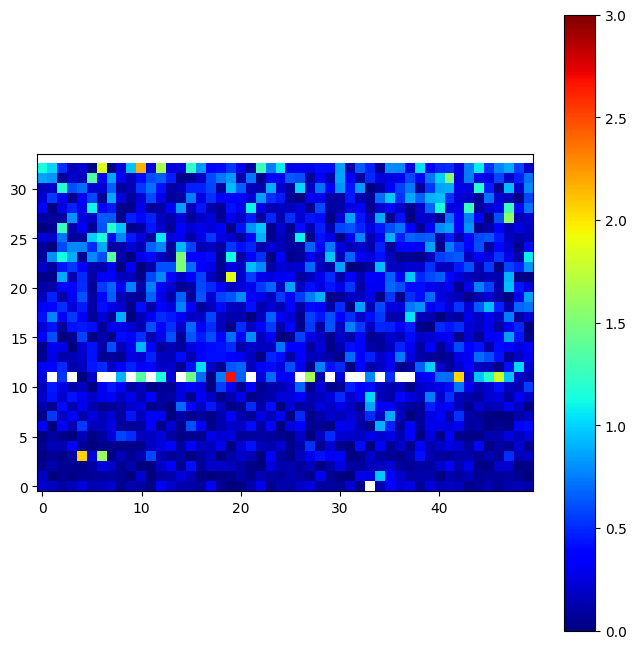

 >> Example 1
 >> Original image:


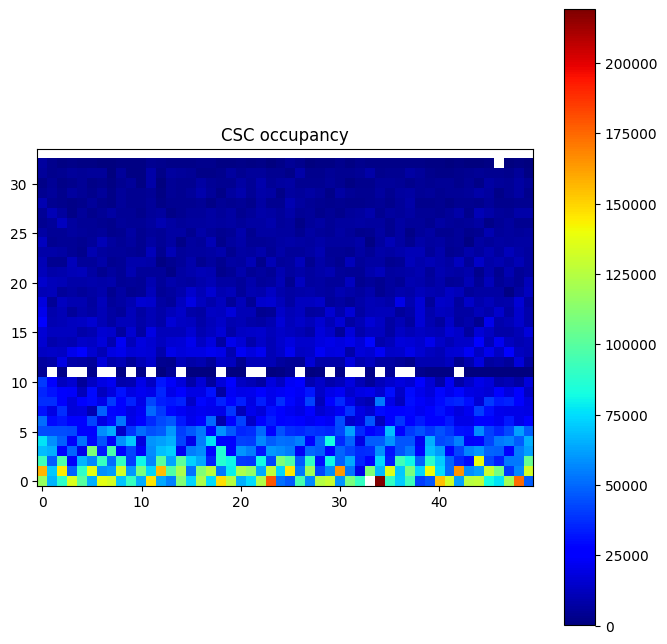

 >> AE-reco image:


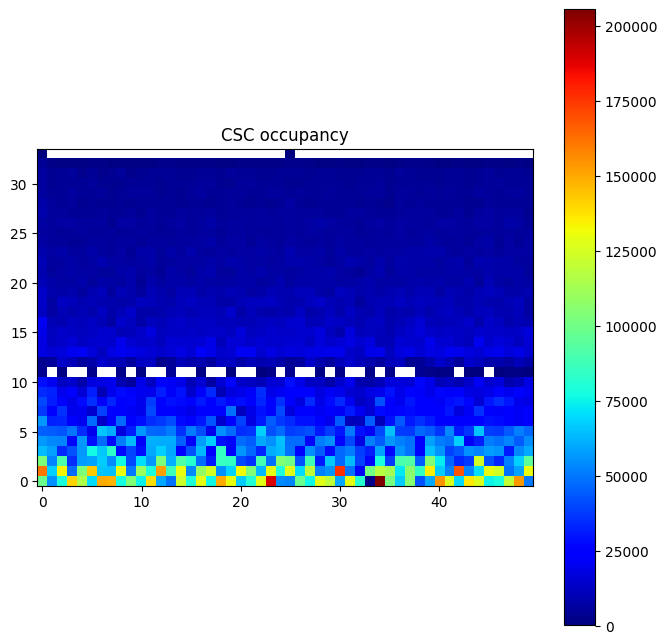

 >> Normalized loss map:


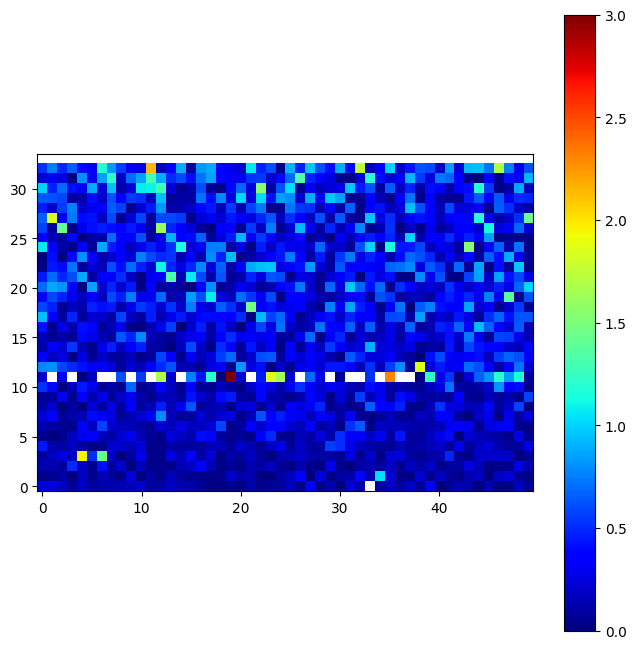

 >> Example 2
 >> Original image:


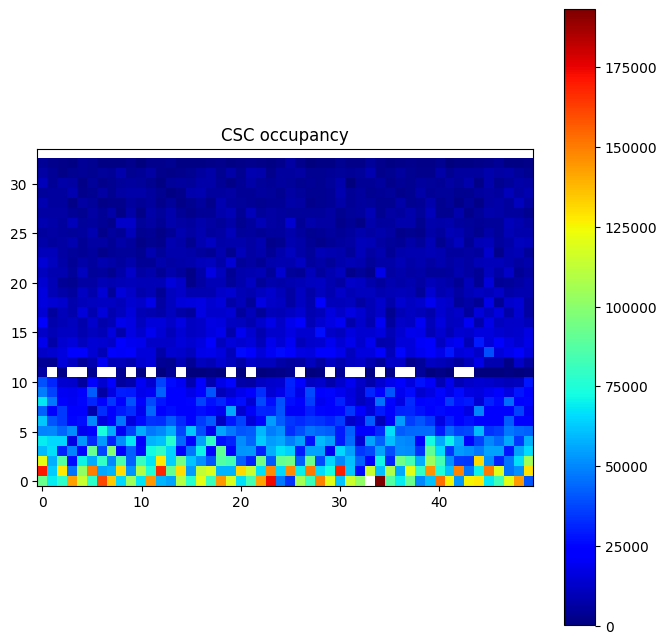

 >> AE-reco image:


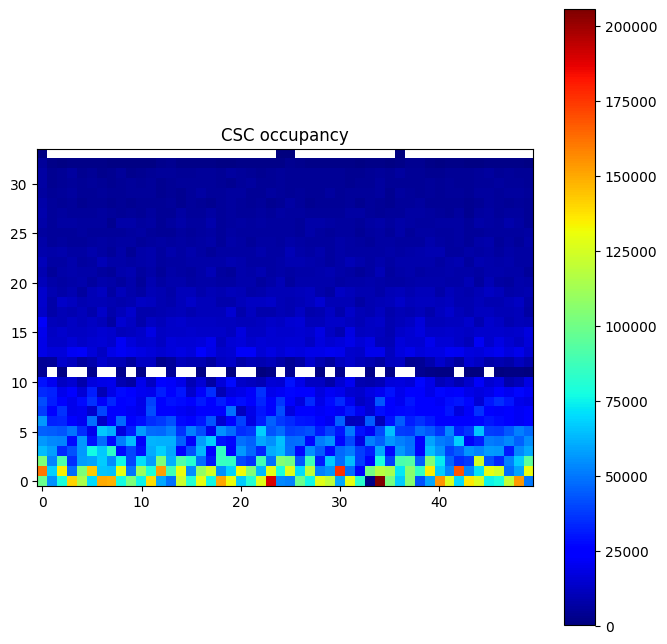

 >> Normalized loss map:


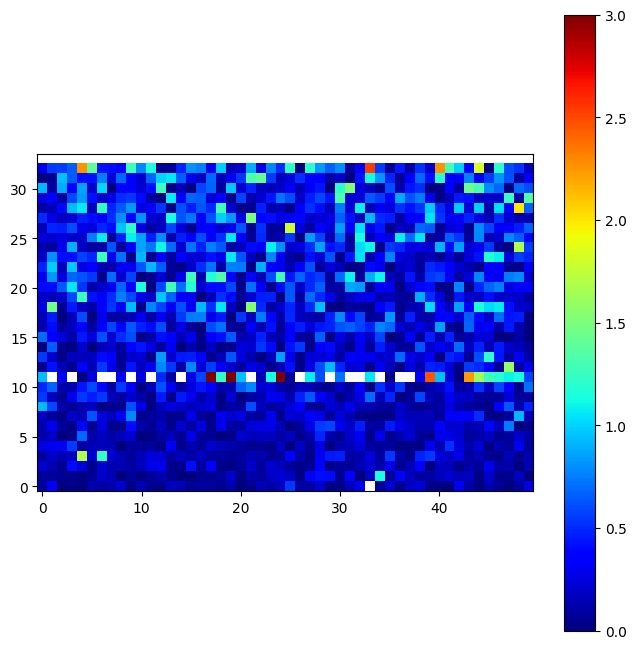

 >> Example 3
 >> Original image:


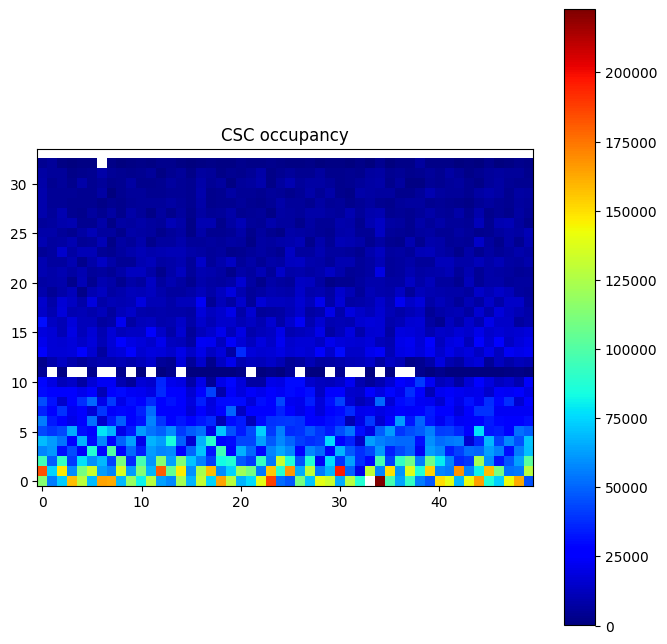

 >> AE-reco image:


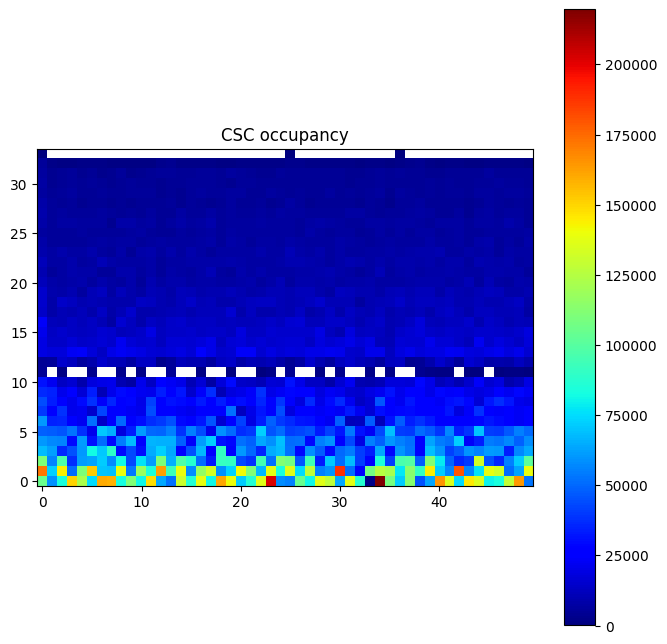

 >> Normalized loss map:


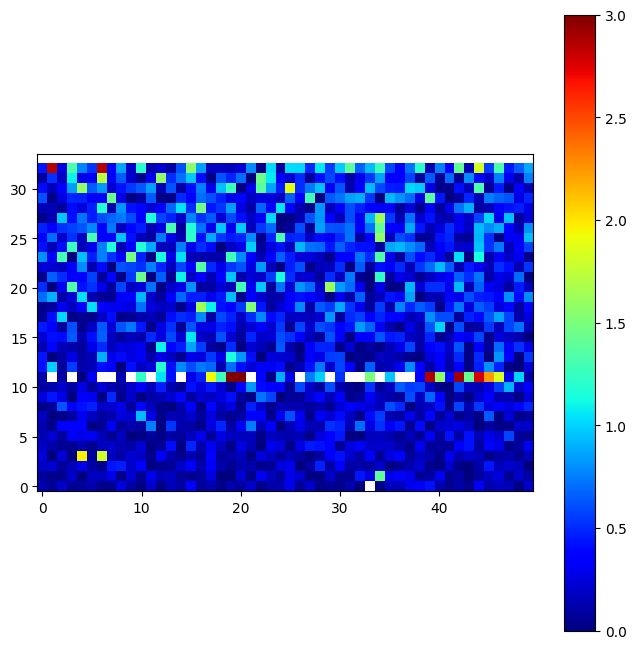

In [12]:
for i, img in enumerate(validation_loader):
    img = img.to(device)
    #img = img*(img<10).float()
    reco_img = ae(img)
    print(f"***** batch {i} *****")
    #k=0
    #if True:
    for k in range(4):
        print(f" >> Example {k}")
        print(' >> Original image:')
        Show2Dimg(img[k][0].cpu().numpy())
        print(' >> AE-reco image:')
        Show2Dimg(reco_img[k][0].detach().cpu().numpy())
        print(' >> Normalized loss map:')
        img_loss = F.l1_loss(reco_img[k], img[k], reduction='none')[0].detach().cpu().numpy()
        #Show2Dimg(img_loss/mean_matrix)
        out = img_loss/mean_matrix
        fig = plt.figure(figsize =(8, 8))
        plt.imshow(out, cmap=plt.cm.jet, vmin=0, vmax=3)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.show()